## Exploratory Data Analysis UPI Rev.1
#### Dataset : https://github.com/crypter7054/EDA-UPI-2022 
#### Keterangan Atribut : 
- **name** = nama dosen 
- **sinta_id**  = id dosen pada website SINTA 
- **dept** = program studi 
- **sinta_score** = skor keseluruhan SINTA 
- **sinta_3yr_score** = skor SINTA dalam 3 tahun terakhir 
- **affil_score** = skor keseluruhan afiliasi 
- **affil_3yr_score** = skor afiliasi dalam 3 tahun terakhir 
- **scopus_h_index** = indeks untuk mengukur produktivitas berdasarkan jumlah publikasi dan sitasi dosen pada Scopus 
- **gs_h_index** = indeks untuk mengukur produktivitas berdasarkan jumlah publikasi dan sitasi dosen pada Google Scholar 
- **wos_h_index** = indeks untuk mengukur produktivitas berdasarkan jumlah publikasi dan sitasi dosen pada Web of Science 
- **scopus_i10_index** = skor dosen dalam publikasi artikel yang disitasi minimal oleh 10 artikel lain pada Scopus 
- **gs_i10_index** = skor dosen dalam publikasi artikel yang disitasi minimal oleh 10 artikel lain pada Google Scholar 
- **wos_i10_index** = skor dosen dalam publikasi artikel yang disitasi minimal oleh 10 artikel lain pada Web of Science 
- **scopus_g_index** = indeks untuk mengukur produktivitas berdasarkan distribusi sitasi dari publikasi dosen pada Scopus 
- **gs_g_index** = indeks untuk mengukur produktivitas berdasarkan distribusi sitasi dari publikasi dosen pada Google Scholar 
- **wos_g_index** = indeks untuk mengukur produktivitas berdasarkan distribusi sitasi dari publikasi dosen pada Web of Science
- **scopus_article** = jumlah publikasi artikel dosen pada Scopus 
- **scopus_citation** = jumlah sitasi pada publikasi dosen pada Scopus 
- **scopus_cited_document** = jumlah publikasi lain yang disitasi oleh dosen pada Scopus 
- **gs_article** = jumlah publikasi artikel dosen pada Google Scholar 
- **gs_citation** = jumlah sitasi pada publikasi dosen pada Google Scholar 
- **gs_cited_document** = jumlah publikasi lain yang disitasi oleh dosen pada Google Scholar 
- **wos_article** = jumlah publikasi artikel dosen pada Web of Science 
- **wos_citation** = jumlah sitasi pada publikasi dosen pada Web of Science 
- **wos_cited_document** = jumlah publikasi lain yang disitasi oleh dosen pada Web of Science

### Import Library

In [1]:
%matplotlib inline
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
from datetime import datetime, date

sns.set_theme(style="darkgrid", palette="deep")

### Read Data

In [2]:
df = pd.read_csv("C:\\Users\\LENOVO\\Scraper-SINTA-UPI-2022\\EDA-UPI-2022\\data\\dosen_praproses.csv", encoding='utf-8')
df.head(1550)

,NIP,nama,Stat.Peg,Gol,Jabatan Fungsional,Pendidikan Terakhir,Fakultas,Kode Prodi,Nama Prodi,sinta_id,...,wos_g_index,scopus_article,scopus_citation,scopus_cited_document,gs_article,gs_citation,gs_cited_document,wos_article,wos_citation,wos_cited_document
0,196202081986011002,"Prof. Dr. H. M. Solehuddin, M.Pd., M.A.",PNS,IV/c,Guru Besar,S3,FIP,86001.0,Bimbingan Dan Konseling (S3),5995348.0,...,2.0,16.0,24.0,10.0,42.0,379.0,22.0,0.0,0.0,0.0
1,195306031980021003,"Prof. Dr. H. Mohammad Ali, M.Pd., M.A.",PNS,IV/e,Guru Besar,S3,FIP,86021.0,Pengembangan Kurikulum (S3),5980905.0,...,NaN,20.0,45.0,13.0,135.0,17415.0,84.0,0.0,0.0,0.0
2,195404021980112001,"Prof. Dr. Hj. Ihat Hatimah, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86005.0,Pendidikan Masyarakat (S3),5979054.0,...,1.0,9.0,0.0,0.0,62.0,452.0,34.0,5.0,0.0,0.0
3,195501011981011001,"Prof. Dr. H. Achmad Hufad, M.Ed.",PNS,IV/e,Guru Besar,S3,FIP,86002.0,Pendidikan Khusus (S3),5977826.0,...,7.0,44.0,110.0,22.0,144.0,436.0,64.0,12.0,39.0,5.0
4,196111091987031001,"Prof. Dr. H. Mustofa Kamil, M.Pd.",PNS,IV/e,Guru Besar,S3,FIP,86105.0,Pendidikan Masyarakat (S2),5994180.0,...,1.0,9.0,8.0,3.0,71.0,1572.0,45.0,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,920200819940117102,"Ishak Ariawan, S.Pd., M.Kom.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241.0,Sistem Informasi Kelautan (S1),6745750.0,...,0.0,2.0,3.0,1.0,9.0,4.0,1.0,0.0,0.0,0.0
1490,920200819900404101,"La Ode Alam Minsaris, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54241.0,Sistem Informasi Kelautan (S1),6760517.0,...,0.0,0.0,0.0,0.0,4.0,6.0,2.0,0.0,0.0,0.0
1491,920200819890313102,"Himawan Prasetiyo, S.Pi., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249.0,Pendidikan Kelautan dan Perikanan Kampus Seran...,6745744.0,...,1.0,1.0,5.0,1.0,7.0,8.0,3.0,0.0,0.0,0.0
1492,920200819900322101,"Mad Rudi, S.Pd., M.Si.",PT,III/b,Tenaga Pengajar,S2,Kampus UPI di Serang,54249.0,Pendidikan Kelautan dan Perikanan Kampus Seran...,6746212.0,...,NaN,0.0,0.0,0.0,5.0,7.0,1.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NIP                    1494 non-null   int64  
 1   nama                   1494 non-null   object 
 2   Stat.Peg               1494 non-null   object 
 3   Gol                    1477 non-null   object 
 4   Jabatan Fungsional     1494 non-null   object 
 5   Pendidikan Terakhir    1494 non-null   object 
 6   Fakultas               1494 non-null   object 
 7   Kode Prodi             1490 non-null   float64
 8   Nama Prodi             1490 non-null   object 
 9   sinta_id               1438 non-null   float64
 10  Jenis Kelamin          1494 non-null   object 
 11  Usia                   1494 non-null   int64  
 12  sinta_score            1437 non-null   float64
 13  sinta_3yr_score        1437 non-null   float64
 14  scopus_h_index         1437 non-null   float64
 15  gs_h

In [4]:
df.isnull().sum()

NIP                        0
nama                       0
Stat.Peg                   0
Gol                       17
Jabatan Fungsional         0
Pendidikan Terakhir        0
Fakultas                   0
Kode Prodi                 4
Nama Prodi                 4
sinta_id                  56
Jenis Kelamin              0
Usia                       0
sinta_score               57
sinta_3yr_score           57
scopus_h_index            57
gs_h_index                57
wos_h_index              757
scopus_i10_index          57
gs_i10_index              57
wos_i10_index            757
scopus_g_index            57
gs_g_index                57
wos_g_index              757
scopus_article            57
scopus_citation           57
scopus_cited_document     57
gs_article                57
gs_citation               57
gs_cited_document         57
wos_article               57
wos_citation              57
wos_cited_document        57
dtype: int64

### Jumlah Dosen Berdasarkan Jenis Kelamin

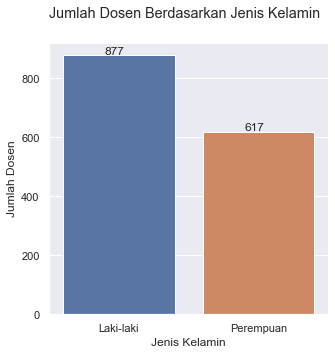

In [5]:
plt.figure(figsize=(5, 5))

g = sns.countplot(x="Jenis Kelamin", data = df, order = df['Jenis Kelamin'].value_counts().index)
g.set(ylabel='Jumlah Dosen')
plt.suptitle("Jumlah Dosen Berdasarkan Jenis Kelamin" , fontsize = 'large', fontweight = 'regular')

for p in g.patches:
   g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+5))

### Jumlah Dosen Berdasarkan Pendidikan Terakhir

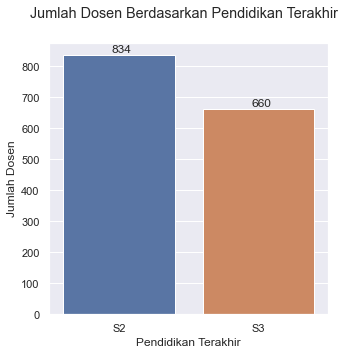

In [6]:
plt.figure(figsize=(5, 5))

g = sns.countplot(x="Pendidikan Terakhir", data = df, order = df['Pendidikan Terakhir'].value_counts().index)
g.set(ylabel='Jumlah Dosen')
plt.suptitle("Jumlah Dosen Berdasarkan Pendidikan Terakhir" , fontsize = 'large', fontweight = 'regular')

for p in g.patches:
   g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

### Jumlah Dosen Berdasarkan Golongan

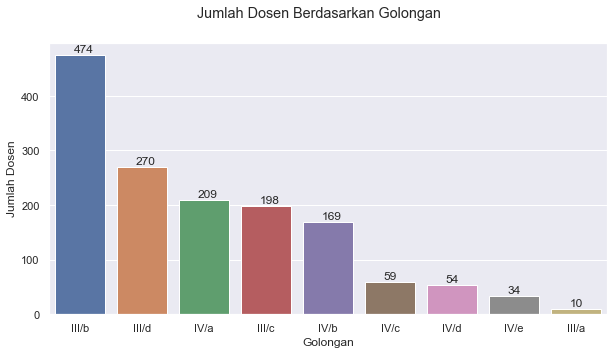

In [7]:
plt.figure(figsize=(10, 5))

g = sns.countplot(x="Gol", data = df, order = df['Gol'].value_counts().index)
g.set(xlabel='Golongan', ylabel='Jumlah Dosen')
plt.suptitle("Jumlah Dosen Berdasarkan Golongan" , fontsize = 'large', fontweight = 'regular')

for p in g.patches:
   g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+5))

### Jumlah Dosen Berdasarkan Jabatan Fungsional

Text(0.5, 0.98, 'Jumlah Dosen Berdasarkan Jabatan Fungsional')

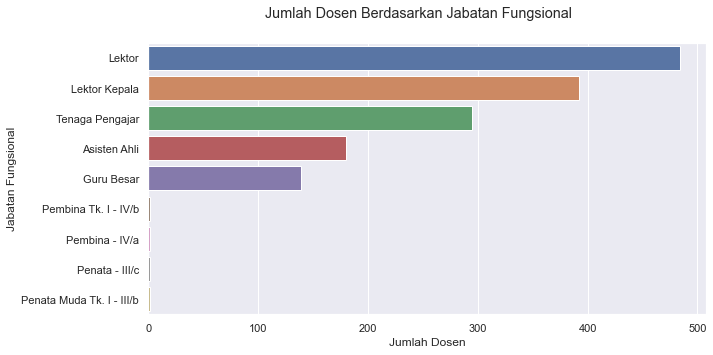

In [8]:
plt.figure(figsize=(10, 5))

g = sns.countplot(y="Jabatan Fungsional", data = df, order = df['Jabatan Fungsional'].value_counts().index)
g.set(xlabel='Jumlah Dosen')
plt.suptitle("Jumlah Dosen Berdasarkan Jabatan Fungsional" , fontsize = 'large', fontweight = 'regular')


### Jumlah Dosen Setiap Fakultas

Text(0.5, 0.98, 'Jumlah Dosen Setiap Fakultas')

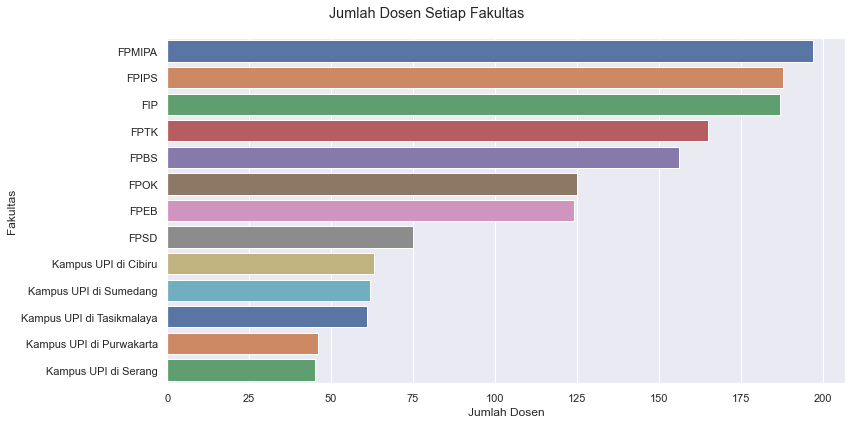

In [56]:
plt.figure(figsize=(12, 6))

g = sns.countplot(y="Fakultas", data=df, order = df['Fakultas'].value_counts().index, palette="deep")
g.set(xlabel='Jumlah Dosen')
plt.suptitle("Jumlah Dosen Setiap Fakultas" , fontsize = 'large', fontweight = 'regular')

### Jumlah Dosen Berdasarkan Jenis Kelamin Setiap Fakultas

Text(0.5, 0.98, 'Jumlah Dosen Berdasarkan Jenis Kelamin Setiap Fakultas')

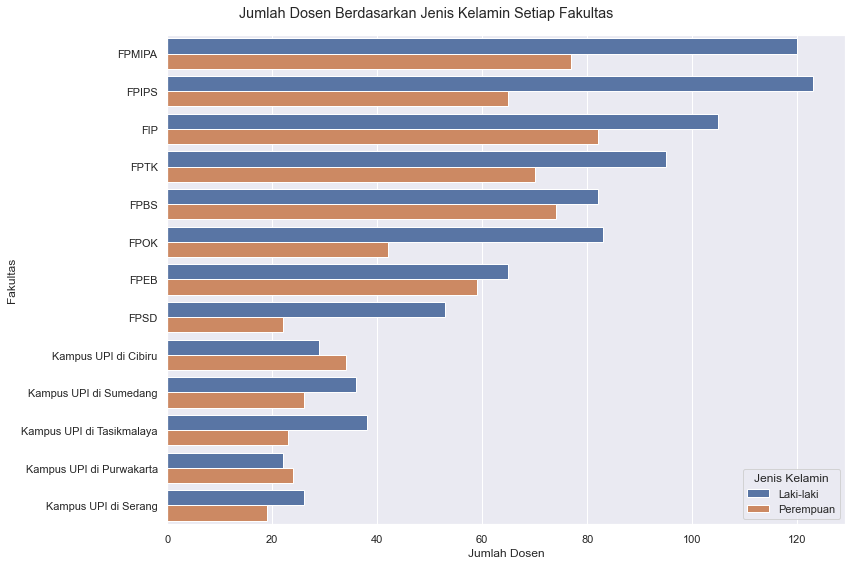

In [57]:
plt.figure(figsize=(12, 8))

g = sns.countplot(y="Fakultas", hue="Jenis Kelamin", data=df, order=df['Fakultas'].value_counts().index, palette="deep")
g.set(xlabel='Jumlah Dosen', ylabel='Fakultas')
plt.suptitle("Jumlah Dosen Berdasarkan Jenis Kelamin Setiap Fakultas" , fontsize = 'large', fontweight = 'regular')

### Jumlah Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas

Text(0.5, 0.98, 'Jumlah Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas')

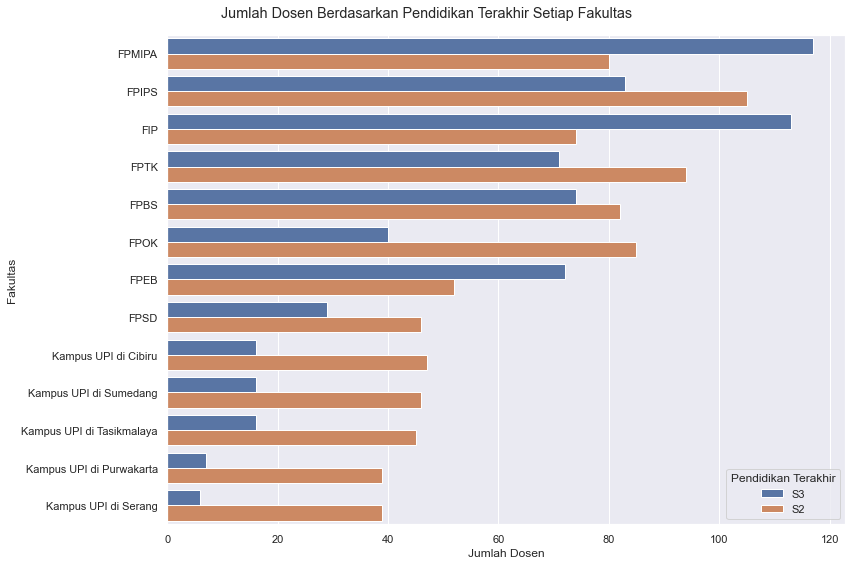

In [58]:
plt.figure(figsize=(12, 8))

g = sns.countplot(y="Fakultas", hue="Pendidikan Terakhir", data=df, order=df['Fakultas'].value_counts().index, palette="deep")
g.set(xlabel='Jumlah Dosen', ylabel='Fakultas')
plt.suptitle("Jumlah Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas" , fontsize = 'large', fontweight = 'regular')

### Distribusi Usia Dosen

In [12]:
df['Usia'].describe()

count    1494.000000
mean       47.092369
std        11.910563
min        25.000000
25%        36.000000
50%        47.000000
75%        58.000000
max        78.000000
Name: Usia, dtype: float64

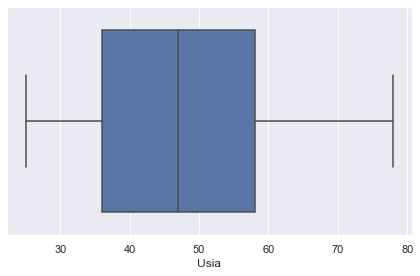

In [13]:
ax = sns.boxplot(data=df, x="Usia")

### Tingkat Kedalaman Usia Dosen Berdasarkan Jenis Kelamin

Text(0.5, 1.0, 'Tingkat Kedalaman Usia Dosen Berdasarkan Jenis Kelamin')

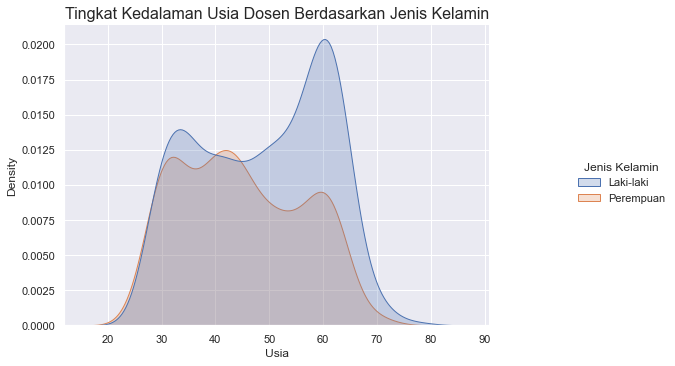

In [60]:
g = sns.displot(df, x="Usia", hue="Jenis Kelamin", kind="kde", fill=True)
g.fig.set_figwidth(10)
plt.title("Tingkat Kedalaman Usia Dosen Berdasarkan Jenis Kelamin", fontsize=16)

### Tingkat Kedalaman Usia Dosen Berdasarkan Pendidikan Terakhir

Text(0.5, 1.0, 'Tingkat Kedalaman Usia Dosen Berdasarkan Pendidikan Terakhir')

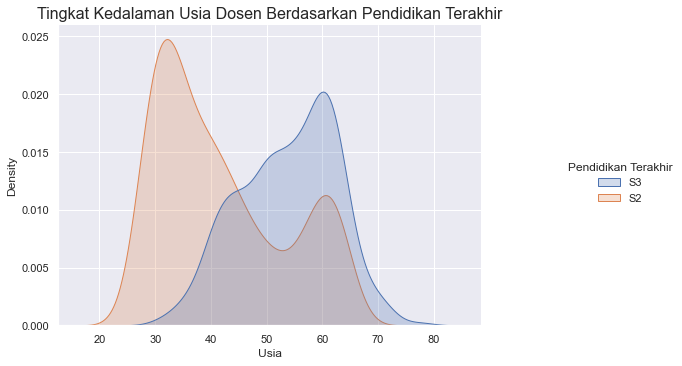

In [61]:
g = sns.displot(df, x="Usia", hue="Pendidikan Terakhir", kind="kde", fill=True)
g.fig.set_figwidth(10)
plt.title("Tingkat Kedalaman Usia Dosen Berdasarkan Pendidikan Terakhir", fontsize=16)

### Distribusi Usia Dosen Berdasarkan Jenis Kelamin Setiap Fakultas

Text(0.5, 0.98, 'Distribusi Usia Dosen Berdasarkan Jenis Kelamin Setiap Fakultas')

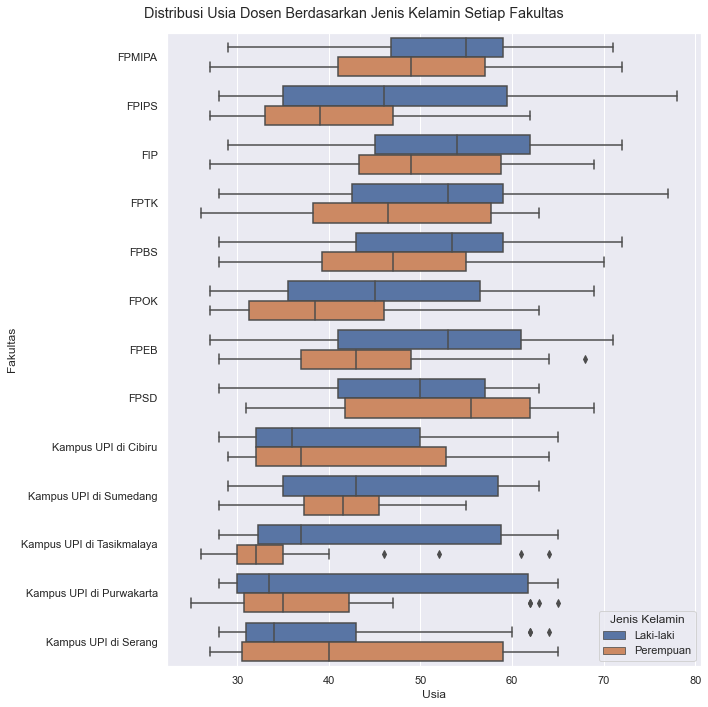

In [64]:
plt.figure(figsize=(10, 10))
g = sns.boxplot(x="Usia", y="Fakultas", hue="Jenis Kelamin", data=df, 
                order = df['Fakultas'].value_counts().index, palette="deep")
plt.suptitle("Distribusi Usia Dosen Berdasarkan Jenis Kelamin Setiap Fakultas" , fontsize = 'large', fontweight = 'regular')

### Distribusi Usia Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas

Text(0.5, 0.98, 'Distribusi Usia Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas')

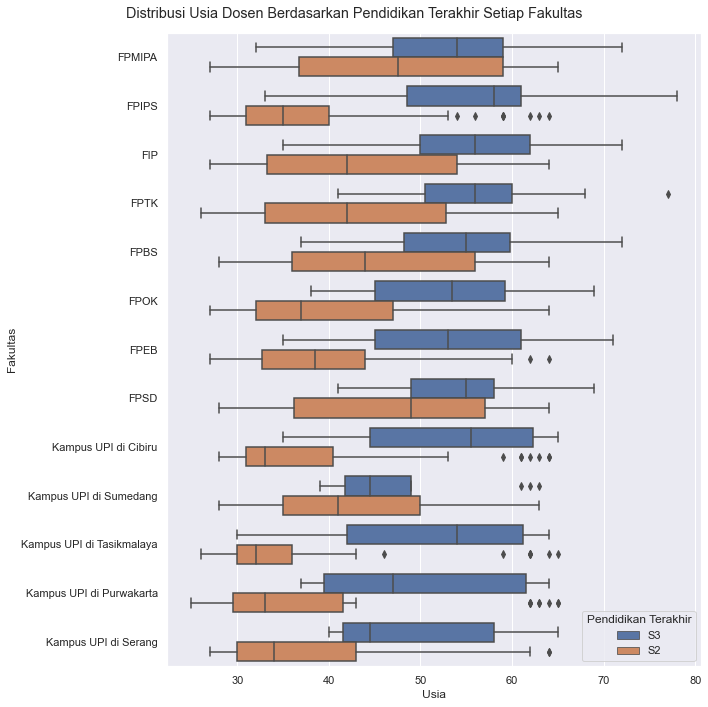

In [66]:
plt.figure(figsize=(10, 10))
g = sns.boxplot(x="Usia", y="Fakultas", hue="Pendidikan Terakhir", data=df, 
                order = df['Fakultas'].value_counts().index, palette="deep")
plt.suptitle("Distribusi Usia Dosen Berdasarkan Pendidikan Terakhir Setiap Fakultas" , fontsize = 'large', fontweight = 'regular')

### Distribusi SINTA Score

In [18]:
df['sinta_score'].describe()

count     1437.000000
mean       338.681280
std        576.555411
min          0.000000
25%         61.000000
50%        169.000000
75%        419.000000
max      12610.000000
Name: sinta_score, dtype: float64

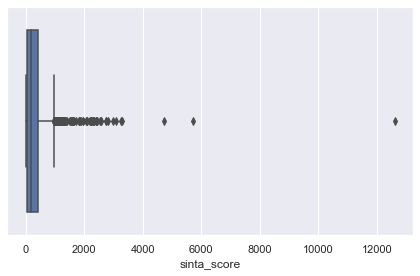

In [19]:
ax = sns.boxplot(data=df, x="sinta_score")

In [20]:
df['sinta_score'].describe()

count     1437.000000
mean       338.681280
std        576.555411
min          0.000000
25%         61.000000
50%        169.000000
75%        419.000000
max      12610.000000
Name: sinta_score, dtype: float64

### Distribusi SINTA Score Setiap Fakultas

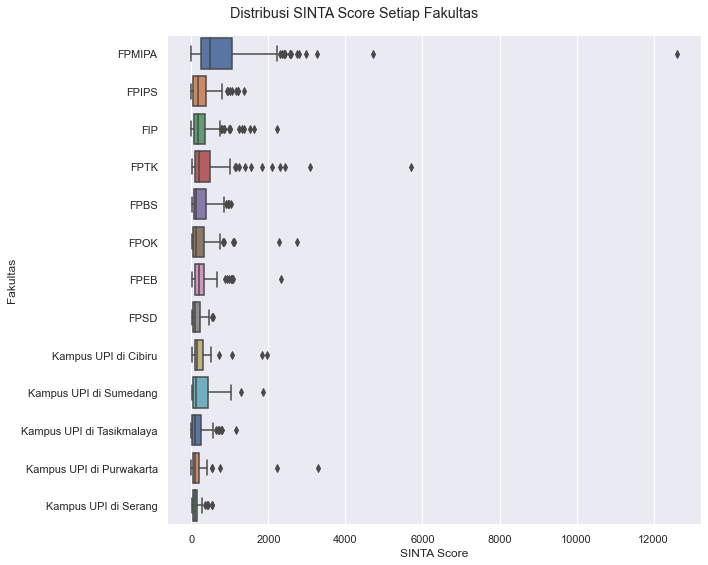

In [67]:
plt.figure(figsize=(10, 8))

fig = sns.boxplot(x ='sinta_score', y = 'Fakultas', data = df, order = df['Fakultas'].value_counts().index, palette="deep", width=0.8)

fig.set(xlabel='SINTA Score', ylabel='Fakultas')
plt.suptitle("Distribusi SINTA Score Setiap Fakultas" , fontsize = 'large', fontweight = 'regular')
plt.show()

### Distribusi SINTA Score Berdasarkan Jenis Kelamin Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

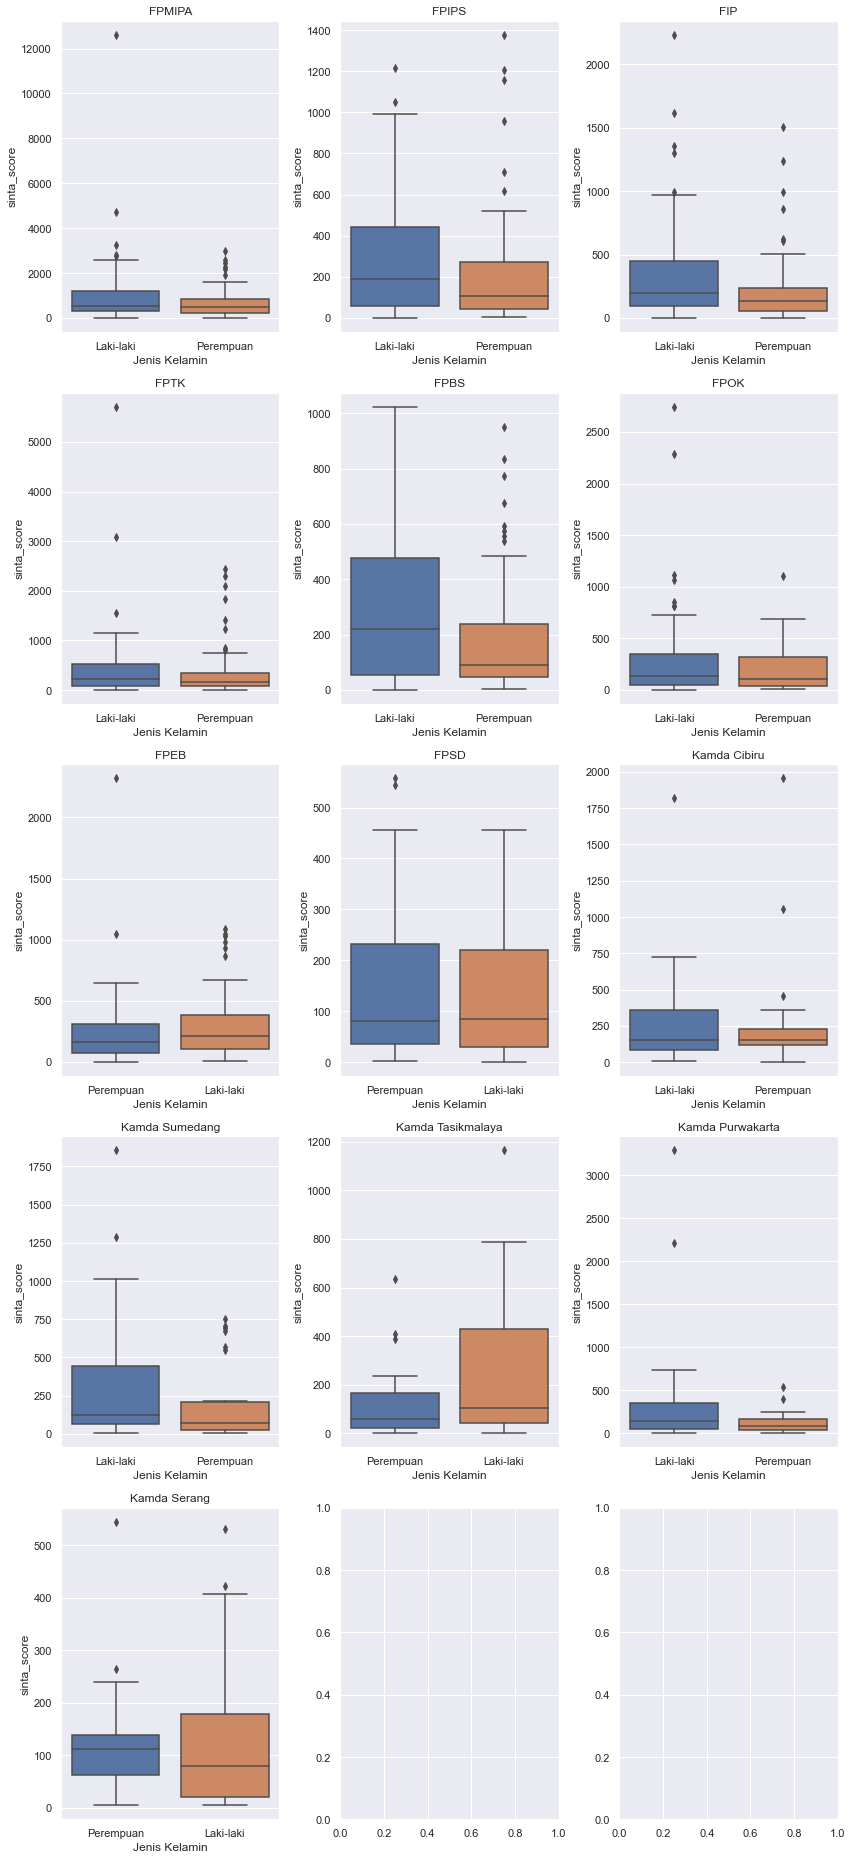

In [22]:
fpmipa = df.loc[df['Fakultas'] == "FPMIPA"]
fpips = df.loc[df['Fakultas'] == "FPIPS"]
fip = df.loc[df['Fakultas'] == "FIP"]
fptk = df.loc[df['Fakultas'] == "FPTK"]
fpbs = df.loc[df['Fakultas'] == "FPBS"]
fpok = df.loc[df['Fakultas'] == "FPOK"]
fpeb = df.loc[df['Fakultas'] == "FPEB"]
fpsd = df.loc[df['Fakultas'] == "FPSD"]
kamda_cibiru = df.loc[df['Fakultas'] == "Kampus UPI di Cibiru"]
kamda_sumedang = df.loc[df['Fakultas'] == "Kampus UPI di Sumedang"]
kamda_tasik = df.loc[df['Fakultas'] == "Kampus UPI di Tasikmalaya"]
kamda_pwk = df.loc[df['Fakultas'] == "Kampus UPI di Purwakarta"]
kamda_serang = df.loc[df['Fakultas'] == "Kampus UPI di Serang"]

fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Jenis Kelamin', y='sinta_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Jenis Kelamin', y='sinta_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Jenis Kelamin', y='sinta_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Jenis Kelamin', y='sinta_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Jenis Kelamin', y='sinta_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Jenis Kelamin', y='sinta_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Jenis Kelamin', y='sinta_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Jenis Kelamin', y='sinta_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Jenis Kelamin', y='sinta_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Jenis Kelamin', y='sinta_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Jenis Kelamin', y='sinta_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Jenis Kelamin', y='sinta_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Jenis Kelamin', y='sinta_score', ax=axes[4,0]).set(title='Kamda Serang')

### Distribusi SINTA Score Berdasarkan Pendidikan Terakhir Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

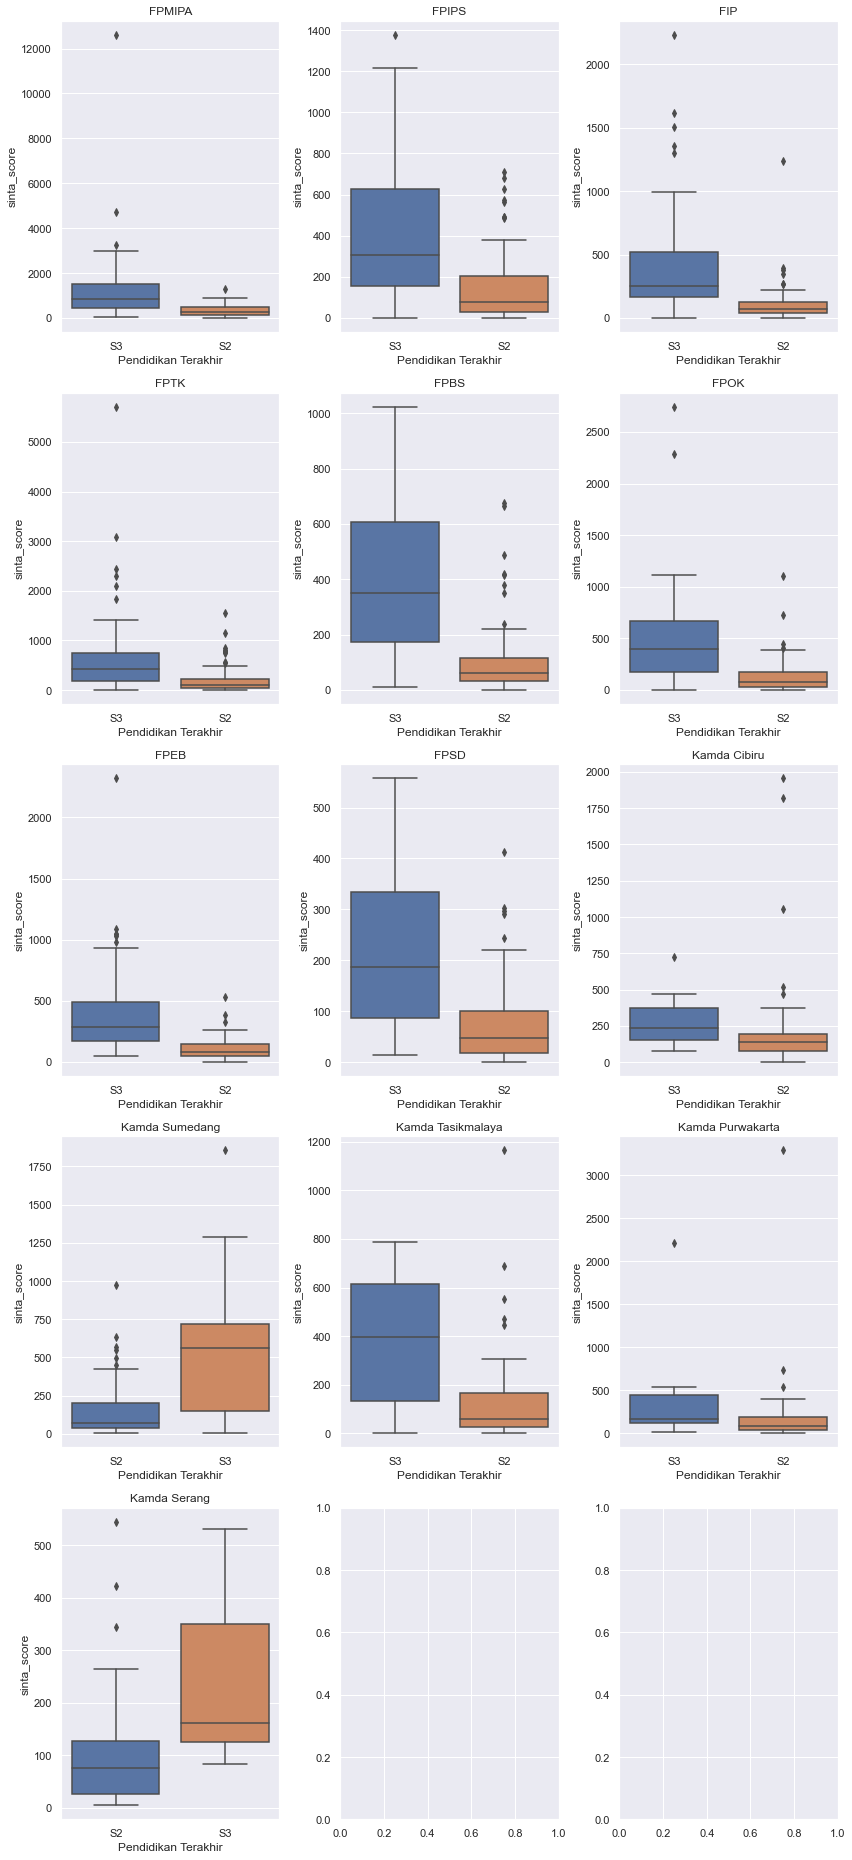

In [23]:
fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Pendidikan Terakhir', y='sinta_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Pendidikan Terakhir', y='sinta_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Pendidikan Terakhir', y='sinta_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Pendidikan Terakhir', y='sinta_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Pendidikan Terakhir', y='sinta_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Pendidikan Terakhir', y='sinta_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Pendidikan Terakhir', y='sinta_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Pendidikan Terakhir', y='sinta_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Pendidikan Terakhir', y='sinta_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Pendidikan Terakhir', y='sinta_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Pendidikan Terakhir', y='sinta_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Pendidikan Terakhir', y='sinta_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Pendidikan Terakhir', y='sinta_score', ax=axes[4,0]).set(title='Kamda Serang')

### Distribusi SINTA 3yr Score

In [24]:
df['sinta_3yr_score'].describe()

count    1437.000000
mean      154.391093
std       276.967505
min         0.000000
25%        21.000000
50%        68.000000
75%       179.000000
max      5308.000000
Name: sinta_3yr_score, dtype: float64

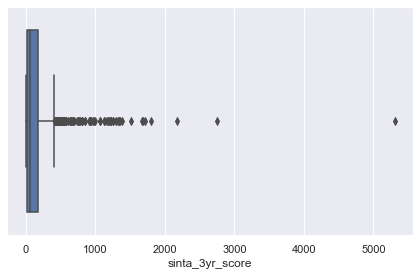

In [25]:
ax = sns.boxplot(data=df, x="sinta_3yr_score")

### Distribusi SINTA 3yr Score Setiap Fakultas

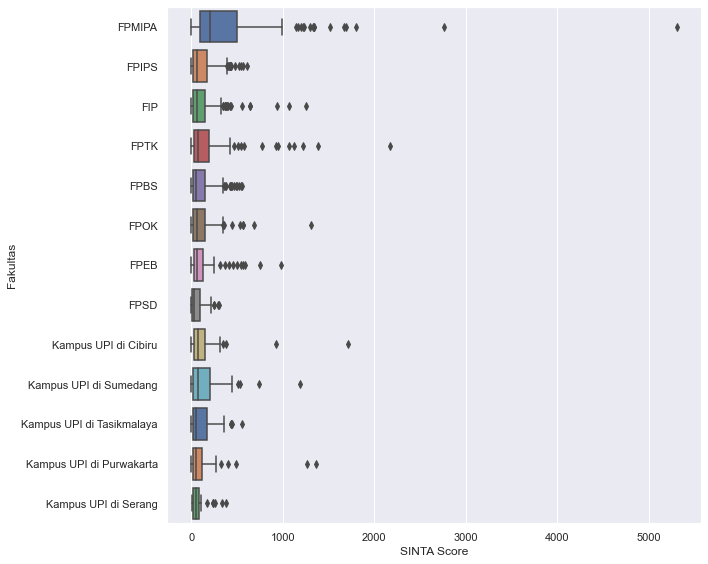

In [26]:
plt.figure(figsize=(10, 8))
# plt.rcParams["figure.autolayout"] = True

fig = sns.boxplot(x ='sinta_3yr_score', y = 'Fakultas', data = df, order = df['Fakultas'].value_counts().index, palette="deep", width=0.8)

fig.set(xlabel='SINTA Score', ylabel='Fakultas')
plt.show()

### Distribusi SINTA 3yr Score Berdasarkan Jenis Kelamin Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

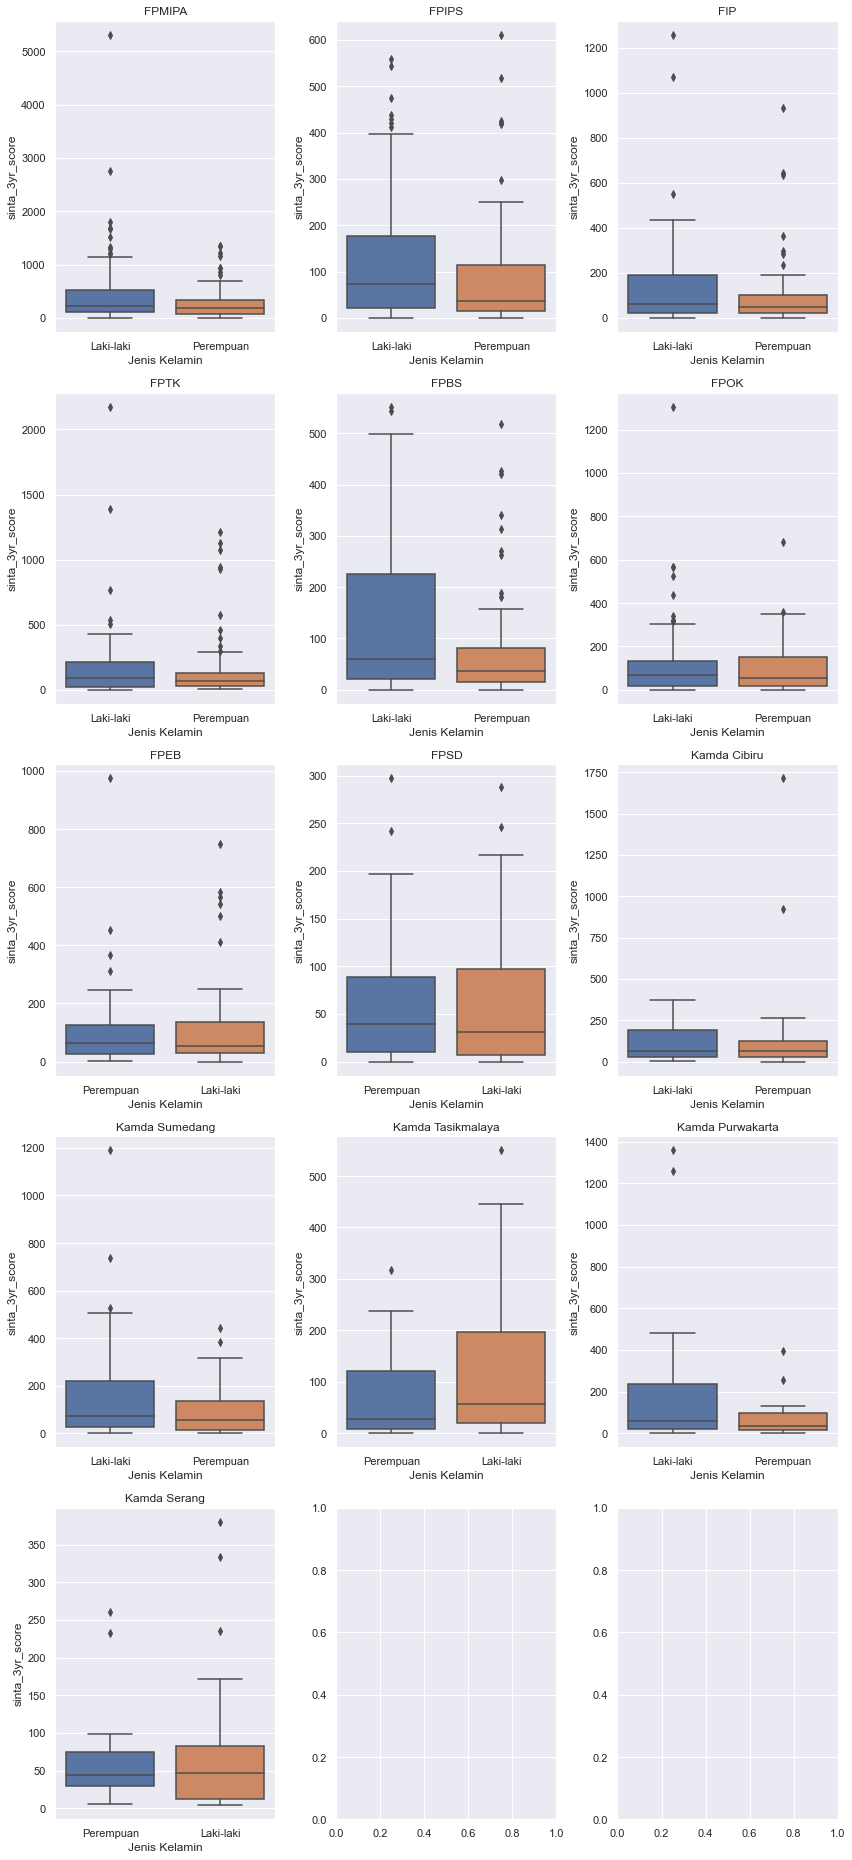

In [27]:
fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Jenis Kelamin', y='sinta_3yr_score', ax=axes[4,0]).set(title='Kamda Serang')

### Distribusi SINTA 3yr Score Berdasarkan Pendidikan Terakhir Dosen Setiap Fakultas

[Text(0.5, 1.0, 'Kamda Serang')]

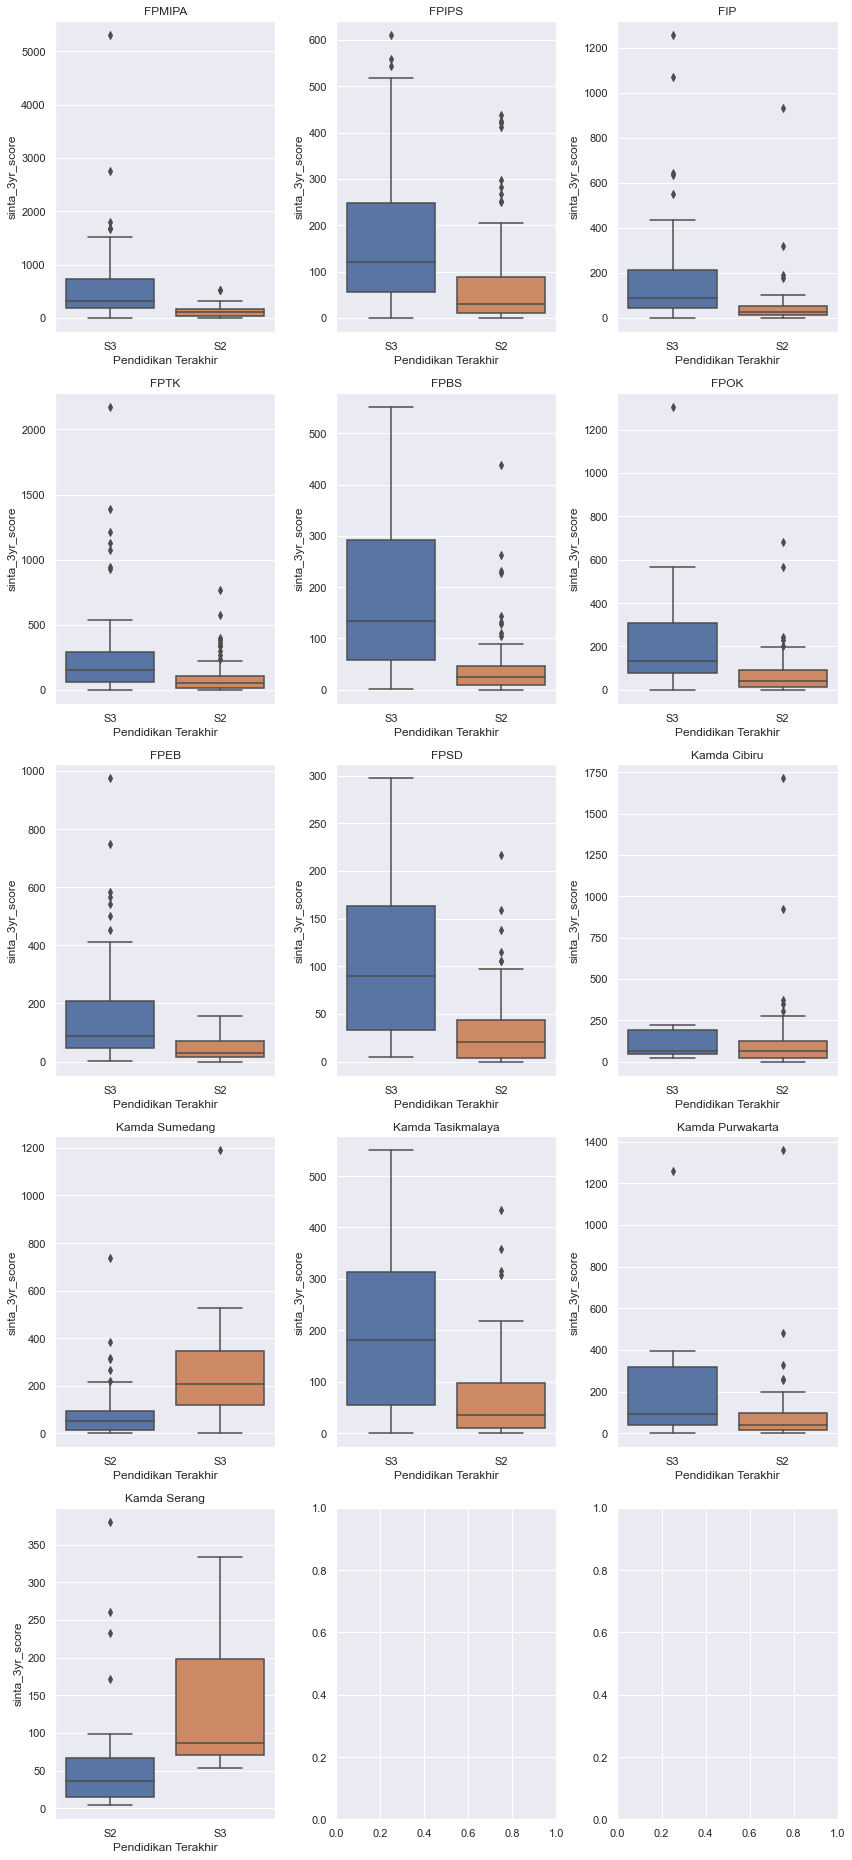

In [28]:
fig, axes = plt.subplots(5, 3, figsize=(12, 26))
fig.tight_layout()
fig.tight_layout(pad=3.0)

sns.boxplot(data=fpmipa, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[0,0]).set(title='FPMIPA')
sns.boxplot(data=fpips, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[0,1]).set(title='FPIPS')
sns.boxplot(data=fip, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[0,2]).set(title='FIP')
sns.boxplot(data=fptk, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[1,0]).set(title='FPTK')
sns.boxplot(data=fpbs, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[1,1]).set(title='FPBS')
sns.boxplot(data=fpok, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[1,2]).set(title='FPOK')
sns.boxplot(data=fpeb, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[2,0]).set(title='FPEB')
sns.boxplot(data=fpsd, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[2,1]).set(title='FPSD')
sns.boxplot(data=kamda_cibiru, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[2,2]).set(title='Kamda Cibiru')
sns.boxplot(data=kamda_sumedang, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[3,0]).set(title='Kamda Sumedang')
sns.boxplot(data=kamda_tasik, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[3,1]).set(title='Kamda Tasikmalaya')
sns.boxplot(data=kamda_pwk, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[3,2]).set(title='Kamda Purwakarta')
sns.boxplot(data=kamda_serang, x='Pendidikan Terakhir', y='sinta_3yr_score', ax=axes[4,0]).set(title='Kamda Serang')

### Perbandingan Distribusi H indeks, G index, dan i10 indeks untuk Scopus, Google Scholar, dan Web of Science

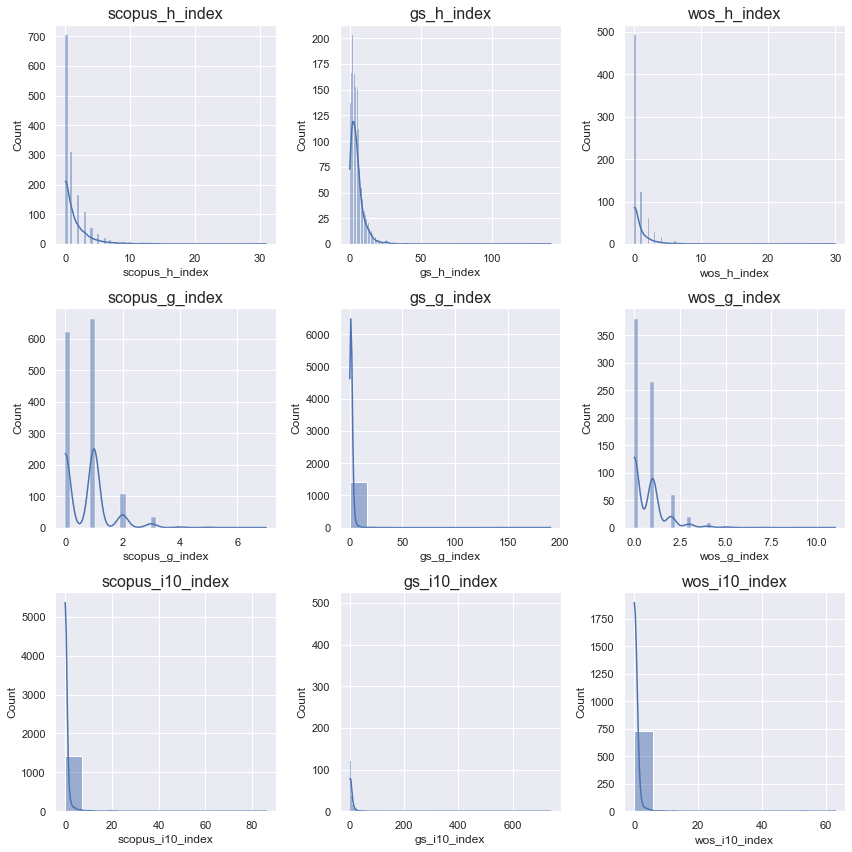

In [29]:
h_index = ['scopus_h_index', 'gs_h_index', 'wos_h_index', 
          'scopus_g_index', 'gs_g_index', 'wos_g_index', 
          'scopus_i10_index', 'gs_i10_index', 'wos_i10_index', ]

fig, axes = plt.subplots(3, 3, figsize = (12, 12))
axes = axes.ravel()
fig.tight_layout(pad = 5)

for col, ax in zip(h_index, axes):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col, fontsize = 16)

plt.show()

### Perbandingan Distribusi Jumlah Artikel Dosen untuk Scopus, Google Scholar, dan Web of Science

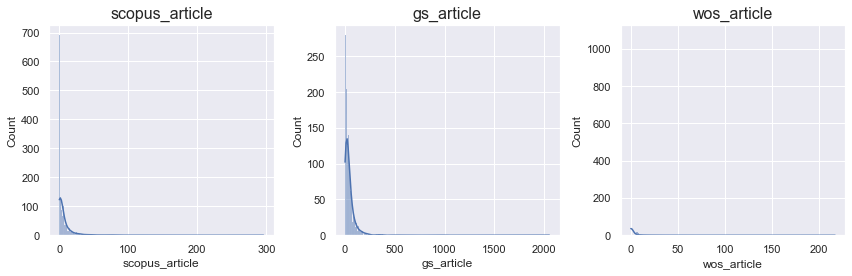

In [30]:
h_index = ['scopus_article', 'gs_article', 'wos_article'] 

fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes = axes.ravel()
fig.tight_layout(pad = 5)

for col, ax in zip(h_index, axes):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col, fontsize = 16)

plt.show()

### Top 10 Program Studi UPI Berdasarkan Jumlah Dosen

Text(0.5, 0.98, 'Top 10 Program Studi UPI Berdasarkan Jumlah Dosen')

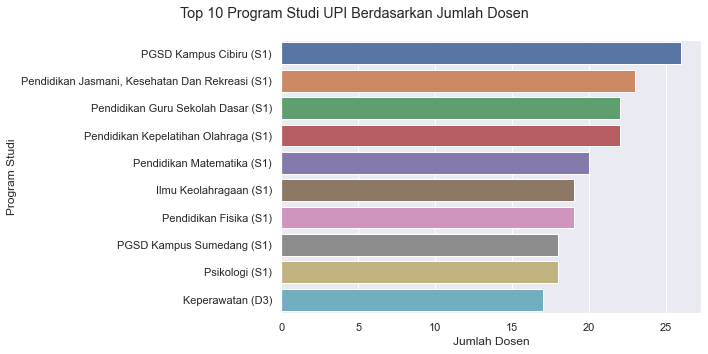

In [31]:
plt.figure(figsize=(10, 5))
g = sns.countplot(y="Nama Prodi", data = df, order = df['Nama Prodi'].value_counts().index[0:10], palette="deep")
g.set(xlabel='Jumlah Dosen', ylabel='Program Studi')
plt.suptitle("Top 10 Program Studi UPI Berdasarkan Jumlah Dosen" , fontsize = 'large', fontweight = 'regular')

### Top 5 Program Studi Setiap Jenjang D3, S1, S2, dan S3 UPI Berdasarkan Jumlah Dosen

Text(8.96, 0.5, '')

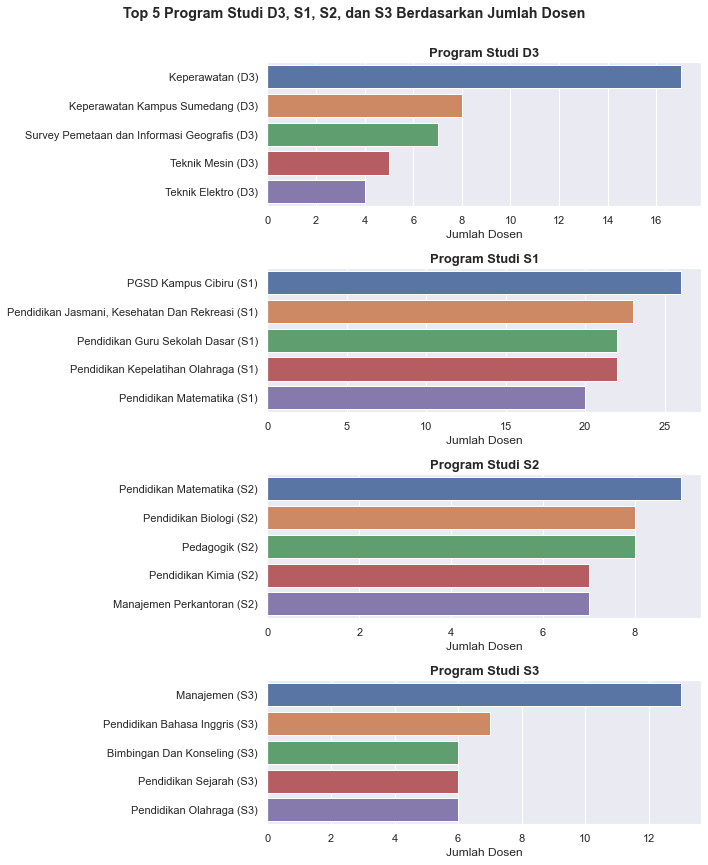

In [32]:
df_D3 = df[df["Nama Prodi"].str.contains("D3") == True]
df_S1 = df[df["Nama Prodi"].str.contains("S1") == True]
df_S2 = df[df["Nama Prodi"].str.contains("S2") == True]
df_S3 = df[df["Nama Prodi"].str.contains("S3") == True]

fig, axes = plt.subplots(4, 1, figsize=(10, 12))
fig.tight_layout()
fig.tight_layout(pad=3)

fig.suptitle("Top 5 Program Studi D3, S1, S2, dan S3 Berdasarkan Jumlah Dosen" , fontsize = 'large', fontweight = 'bold', y=1)

d3 = sns.countplot(y='Nama Prodi', data = df_D3, order = df_D3['Nama Prodi'].value_counts().index[0:5], 
              palette="deep", ax=axes[0])

s1 = sns.countplot(y='Nama Prodi', data = df_S1, order = df_S1['Nama Prodi'].value_counts().index[0:5], 
              palette="deep", ax=axes[1])

s2 = sns.countplot(y='Nama Prodi', data = df_S2, order = df_S2['Nama Prodi'].value_counts().index[0:5], 
              palette="deep", ax=axes[2])


s3 = sns.countplot(y='Nama Prodi', data = df_S3, order = df_S3['Nama Prodi'].value_counts().index[0:5], 
              palette="deep", ax=axes[3])
d3.set_title('Program Studi D3',fontweight="bold", size=13)
d3.set_xlabel('Jumlah Dosen', fontsize = 12)
d3.set_ylabel('')


s1.set_title('Program Studi S1',fontweight="bold", size=13)
s1.set_xlabel('Jumlah Dosen', fontsize = 12)
s1.set_ylabel('')


s2.set_title('Program Studi S2',fontweight="bold", size=13)
s2.set_xlabel('Jumlah Dosen', fontsize = 12)
s2.set_ylabel('')

s3.set_title('Program Studi S3',fontweight="bold", size=13)
s3.set_xlabel('Jumlah Dosen', fontsize = 12)
s3.set_ylabel('')

### Top 10 Dosen Berdasarkan Scopus H Index

Text(0.5, 0.98, 'Top 10 Dosen Berdasarkan Scopus H Index')

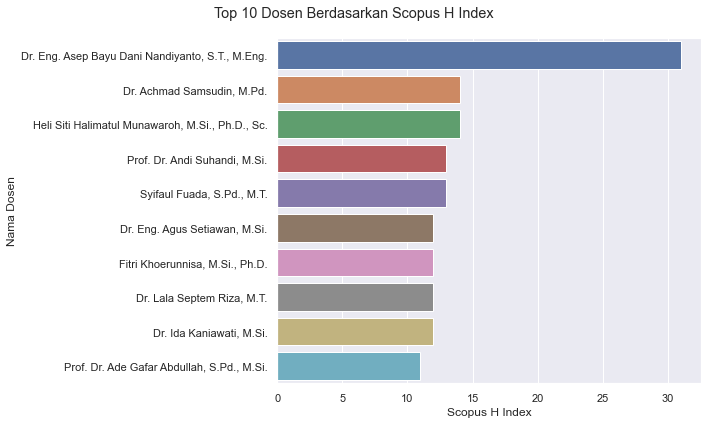

In [33]:
plt.figure(figsize=(10, 6))

top_scopus_hindex = df.sort_values(by="scopus_h_index", ascending=False).head(10)
g = sns.barplot(x="scopus_h_index", y="nama", data=top_scopus_hindex, palette="deep")
g.set(ylabel='Nama Dosen', xlabel='Scopus H Index')
plt.suptitle("Top 10 Dosen Berdasarkan Scopus H Index" , fontsize = 'large', fontweight = 'regular')

### Top 10 Dosen Berdasarkan Google Scholar H Index

Text(0.5, 0.98, 'Top 10 Dosen Berdasarkan Google Scholar H Index')

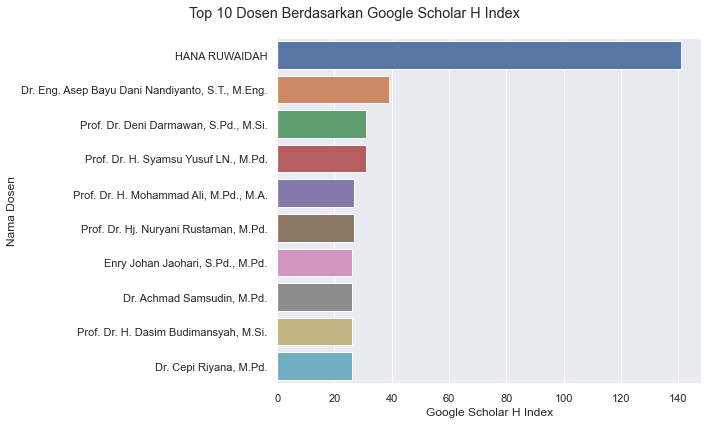

In [34]:
plt.figure(figsize=(10, 6))

top_gs_hindex = df.sort_values(by="gs_h_index", ascending=False).head(10)
g = sns.barplot(x="gs_h_index", y="nama", data=top_gs_hindex, palette="deep")
g.set(ylabel='Nama Dosen', xlabel='Google Scholar H Index')
plt.suptitle("Top 10 Dosen Berdasarkan Google Scholar H Index" , fontsize = 'large', fontweight = 'regular')

### Top 10 Dosen Berdasarkan SINTA 3yr Score

Text(0.5, 0.98, 'Top 10 Dosen Berdasarkan SINTA 3yr Score')

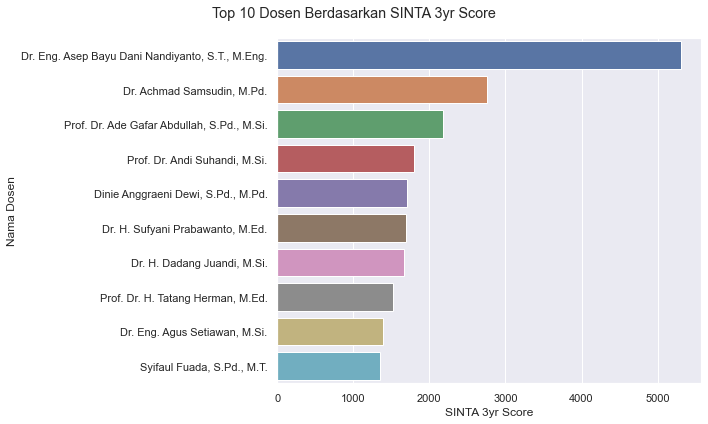

In [35]:
plt.figure(figsize=(10, 6))

top_sinta_3yr_score = df.sort_values(by="sinta_3yr_score", ascending=False).head(10)

g = sns.barplot(x="sinta_3yr_score", y="nama", data=top_sinta_3yr_score, palette="deep")
g.set(ylabel='Nama Dosen', xlabel='SINTA 3yr Score')
plt.suptitle("Top 10 Dosen Berdasarkan SINTA 3yr Score" , fontsize = 'large', fontweight = 'regular')

### Top 10 Dosen Berdasarkan SINTA Score

Text(0.5, 0.98, 'Top 10 Dosen Berdasarkan SINTA Score')

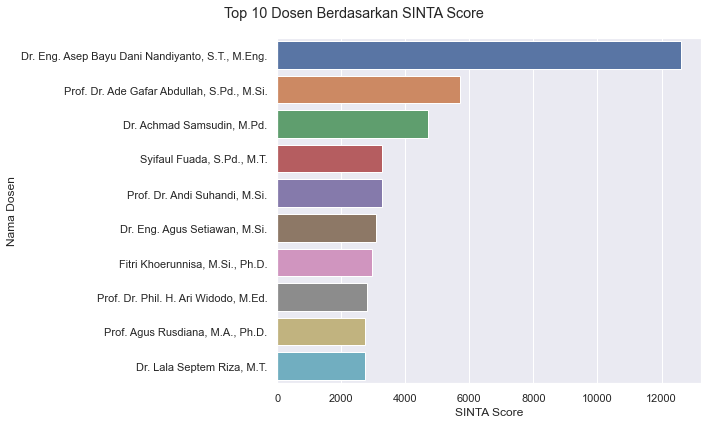

In [36]:
plt.figure(figsize=(10, 6))

top_sinta_score = df.sort_values(by="sinta_score", ascending=False).head(10)
g = sns.barplot(x="sinta_score", y="nama", data=top_sinta_score, palette="deep")
g.set(ylabel='Nama Dosen', xlabel='SINTA Score')
plt.suptitle("Top 10 Dosen Berdasarkan SINTA Score" , fontsize = 'large', fontweight = 'regular')